In [10]:
import os
import numpy as np
import sgf
import json

# Function to load and parse SGF/SGFS files
def load_sgf_file(file_path):
    with open(file_path, 'r') as sgf_file:
        sgf_content = sgf_file.read()
    sgf_games = sgf.parse(sgf_content)
    return sgf_games

# Function to load and process NPZ files
def load_npz_file(file_path):
    data = np.load(file_path)
    return {key: data[key] for key in data.files}

# Function to process either sgf, sgfs, or npz files
def process_output_files(path):
    if os.path.isdir(path):
        # If it's a directory, process all the files inside
        files = os.listdir(path)
        for file in files:
            file_path = os.path.join(path, file)
            process_file(file_path)
    elif os.path.isfile(path):
        # If it's a file, process the file directly
        process_file(path)
    else:
        print(f"Error: {path} is neither a file nor a directory.")

# Function to process a single file (SGF, SGFS, NPZ)
def process_file(file_path):
    if file_path.endswith('.sgf') or file_path.endswith('.sgfs'):
        print(f"Processing SGF/SGFS file: {file_path}")
        sgf_data = load_sgf_file(file_path)
        print(sgf_data)
    elif file_path.endswith('.npz'):
        print(f"Processing NPZ file: {file_path}")
        npz_data = load_npz_file(file_path)
        for key, value in npz_data.items():
            print(f"Key: {key}, Value shape: {value.shape}")
    else:
        print(f"Unknown file format: {file_path}")

# Example usage
selfplay_log_path = "data/kata/3410D33F8D987D6B.sgfs"  # Assuming this is a file
process_output_files(selfplay_log_path)


Processing SGF/SGFS file: data/kata/3410D33F8D987D6B.sgfs


In [12]:
import os
import numpy as np
import sgf

# Function to load and parse SGF/SGFS files
def load_sgf_file(file_path):
    with open(file_path, 'r') as sgf_file:
        sgf_content = sgf_file.read()
    sgf_collection = sgf.parse(sgf_content)
    return sgf_collection

# Function to display the contents of the SGF file
def display_sgf_data(sgf_collection):
    for game_index, game in enumerate(sgf_collection):
        print(f"Game {game_index + 1}:")
        root_node = game.root
        
        # Extract metadata correctly using properties directly
        board_size = root_node.properties.get('SZ', ['Unknown'])[0]
        player_black = root_node.properties.get('PB', ['Unknown'])[0]
        player_white = root_node.properties.get('PW', ['Unknown'])[0]
        result = root_node.properties.get('RE', ['Unknown'])[0]
        
        # Display metadata
        print(f"  Game size (board): {board_size}")
        print(f"  Player Black: {player_black}")
        print(f"  Player White: {player_white}")
        print(f"  Result: {result}")
        
        # Extracting moves
        print(f"  Moves:")
        node = root_node
        while node is not None:
            move = node.properties.get('B') or node.properties.get('W')
            if move:
                player = 'B' if 'B' in node.properties else 'W'
                print(f"    {player}: {move}")
            node = node.next

# Function to load and process NPZ files
def load_npz_file(file_path):
    data = np.load(file_path)
    return {key: data[key] for key in data.files}

# Function to process either sgf, sgfs, or npz files
def process_output_files(path):
    if os.path.isdir(path):
        # If it's a directory, process all the files inside
        files = os.listdir(path)
        for file in files:
            file_path = os.path.join(path, file)
            process_file(file_path)
    elif os.path.isfile(path):
        # If it's a file, process the file directly
        process_file(path)
    else:
        print(f"Error: {path} is neither a file nor a directory.")

# Function to process a single file (SGF, SGFS, NPZ)
def process_file(file_path):
    if file_path.endswith('.sgf') or file_path.endswith('.sgfs'):
        print(f"Processing SGF/SGFS file: {file_path}")
        sgf_data = load_sgf_file(file_path)
        display_sgf_data(sgf_data)
    elif file_path.endswith('.npz'):
        print(f"Processing NPZ file: {file_path}")
        npz_data = load_npz_file(file_path)
        for key, value in npz_data.items():
            print(f"Key: {key}, Value shape: {value.shape}")
    else:
        print(f"Unknown file format: {file_path}")

# Example usage
selfplay_log_path = "data/kata/3410D33F8D987D6B.sgfs"
process_output_files(selfplay_log_path)

import numpy as np

# Load the .npz file
data = np.load("data/kata/0163D9F0F6642BD3.npz")

# Display the contents of the file
for key in data.files:
    print(f"Key: {key}, Shape: {data[key].shape}")

# Access specific arrays
board_states = data['binaryInputNCHWPacked']
move_probabilities = data['policyTargetsNCMove']
game_values = data['valueTargetsNCHW']


Processing SGF/SGFS file: data/kata/3410D33F8D987D6B.sgfs
Game 1:
  Game size (board): 9
  Player Black: hex27x3.bin.gz
  Player White: hex27x3.bin.gz
  Result: B+
  Moves:
    B: ['ab']
    W: ['ee']
    B: ['be']
    W: ['dh']
    B: ['gg']
    W: ['gf']
    B: ['hd']
    W: ['hc']
    B: ['bh']
    W: ['dc']
    B: ['fg']
    W: ['ed']
    B: ['fc']
    W: ['gh']
    B: ['ff']
    W: ['ia']
    B: ['fd']
    W: ['fe']
    B: ['gd']
    W: ['ei']
    B: ['ce']
    W: ['ag']
    B: ['hg']
    W: ['ge']
    B: ['ad']
    W: ['ac']
    B: ['ie']
    W: ['eb']
    B: ['gb']
    W: ['hi']
    B: ['bc']
    W: ['cg']
    B: ['bg']
    W: ['bb']
    B: ['cb']
Game 2:
  Game size (board): 9
  Player Black: hex27x3.bin.gz
  Player White: hex27x3.bin.gz
  Result: B+
  Moves:
    B: ['dd']
    W: ['ee']
    B: ['fc']
    W: ['ec']
    B: ['ef']
    W: ['fh']
    B: ['gc']
    W: ['df']
    B: ['dg']
    W: ['cg']
    B: ['ed']
    W: ['cd']
    B: ['cf']
Game 3:
  Game size (board): 13
  Player

In [13]:
import os
import numpy as np
import sgf

# Function to load and parse SGF/SGFS files
def load_sgf_file(file_path):
    with open(file_path, 'r') as sgf_file:
        sgf_content = sgf_file.read()
    sgf_collection = sgf.parse(sgf_content)
    return sgf_collection

# Function to display the contents of the SGF file and provide insights
def display_sgf_data(sgf_collection):
    total_games = len(sgf_collection)
    black_wins = 0
    white_wins = 0
    total_moves_per_game = []

    for game_index, game in enumerate(sgf_collection):
        print(f"Game {game_index + 1}:")
        root_node = game.root
        
        # Extract metadata correctly using properties directly
        board_size = root_node.properties.get('SZ', ['Unknown'])[0]
        player_black = root_node.properties.get('PB', ['Unknown'])[0]
        player_white = root_node.properties.get('PW', ['Unknown'])[0]
        result = root_node.properties.get('RE', ['Unknown'])[0]
        
        # Track results for insights
        if 'B+' in result:
            black_wins += 1
        elif 'W+' in result:
            white_wins += 1

        # Display metadata
        print(f"  Game size (board): {board_size}")
        print(f"  Player Black: {player_black}")
        print(f"  Player White: {player_white}")
        print(f"  Result: {result}")
        
        # Extracting moves
        print(f"  Moves:")
        move_count = 0
        node = root_node
        while node is not None:
            move = node.properties.get('B') or node.properties.get('W')
            if move:
                player = 'B' if 'B' in node.properties else 'W'
                print(f"    {player}: {move}")
                move_count += 1
            node = node.next
        
        total_moves_per_game.append(move_count)

    # Display aggregated insights
    print("\n===== Game Insights =====")
    print(f"Total games: {total_games}")
    print(f"Black wins: {black_wins} ({(black_wins / total_games) * 100:.2f}%)")
    print(f"White wins: {white_wins} ({(white_wins / total_games) * 100:.2f}%)")
    print(f"Average moves per game: {np.mean(total_moves_per_game):.2f}")
    print(f"Max moves in a game: {np.max(total_moves_per_game)}")
    print(f"Min moves in a game: {np.min(total_moves_per_game)}")

# Function to load and process NPZ files for additional game insights
def load_npz_file(file_path):
    data = np.load(file_path)
    print(f"Processing NPZ file: {file_path}")

    # Get the specific arrays for insight analysis
    board_states = data['binaryInputNCHWPacked']
    move_probabilities = data['policyTargetsNCMove']
    game_values = data['valueTargetsNCHW']

    print(f"Board states shape: {board_states.shape}")
    print(f"Move probabilities shape: {move_probabilities.shape}")
    print(f"Game values shape: {game_values.shape}")

    # Show some insights into move probabilities and game values
    print(f"\nSample move probabilities (first game): {move_probabilities[0][:10]}")
    print(f"Sample game values (first game): {game_values[0][:10]}")

# Function to process either sgf, sgfs, or npz files
def process_output_files(path):
    if os.path.isdir(path):
        # If it's a directory, process all the files inside
        files = os.listdir(path)
        for file in files:
            file_path = os.path.join(path, file)
            process_file(file_path)
    elif os.path.isfile(path):
        # If it's a file, process the file directly
        process_file(path)
    else:
        print(f"Error: {path} is neither a file nor a directory.")

# Function to process a single file (SGF, SGFS, NPZ)
def process_file(file_path):
    if file_path.endswith('.sgf') or file_path.endswith('.sgfs'):
        print(f"Processing SGF/SGFS file: {file_path}")
        sgf_data = load_sgf_file(file_path)
        display_sgf_data(sgf_data)
    elif file_path.endswith('.npz'):
        load_npz_file(file_path)
    else:
        print(f"Unknown file format: {file_path}")

# Example usage
selfplay_log_path = "data/kata/3410D33F8D987D6B.sgfs"
process_output_files(selfplay_log_path)

# Load NPZ example
npz_file_path = "data/kata/0163D9F0F6642BD3.npz"
process_output_files(npz_file_path)


Processing SGF/SGFS file: data/kata/3410D33F8D987D6B.sgfs
Game 1:
  Game size (board): 9
  Player Black: hex27x3.bin.gz
  Player White: hex27x3.bin.gz
  Result: B+
  Moves:
    B: ['ab']
    W: ['ee']
    B: ['be']
    W: ['dh']
    B: ['gg']
    W: ['gf']
    B: ['hd']
    W: ['hc']
    B: ['bh']
    W: ['dc']
    B: ['fg']
    W: ['ed']
    B: ['fc']
    W: ['gh']
    B: ['ff']
    W: ['ia']
    B: ['fd']
    W: ['fe']
    B: ['gd']
    W: ['ei']
    B: ['ce']
    W: ['ag']
    B: ['hg']
    W: ['ge']
    B: ['ad']
    W: ['ac']
    B: ['ie']
    W: ['eb']
    B: ['gb']
    W: ['hi']
    B: ['bc']
    W: ['cg']
    B: ['bg']
    W: ['bb']
    B: ['cb']
Game 2:
  Game size (board): 9
  Player Black: hex27x3.bin.gz
  Player White: hex27x3.bin.gz
  Result: B+
  Moves:
    B: ['dd']
    W: ['ee']
    B: ['fc']
    W: ['ec']
    B: ['ef']
    W: ['fh']
    B: ['gc']
    W: ['df']
    B: ['dg']
    W: ['cg']
    B: ['ed']
    W: ['cd']
    B: ['cf']
Game 3:
  Game size (board): 13
  Player

Processing SGF/SGFS file: data/kata/3410D33F8D987D6B.sgfs
Game 1:
Game 2:
Game 3:
Game 4:
Game 5:
Game 6:
Game 7:
Game 8:
Game 9:
Game 10:
Game 11:
Game 12:
Game 13:
Game 14:
Game 15:
Game 16:
Game 17:
Game 18:
Game 19:
Game 20:
Game 21:
Game 22:
Game 23:
Game 24:
Game 25:
Game 26:
Game 27:
Game 28:
Game 29:
Game 30:
Game 31:
Game 32:
Game 33:
Game 34:
Game 35:
Game 36:
Game 37:
Game 38:
Game 39:
Game 40:
Game 41:
Game 42:
Game 43:
Game 44:
Game 45:
Game 46:
Game 47:
Game 48:
Game 49:
Game 50:
Game 51:
Game 52:
Game 53:
Game 54:
Game 55:
Game 56:
Game 57:
Game 58:
Game 59:
Game 60:
Game 61:
Game 62:
Game 63:
Game 64:
Game 65:
Game 66:
Game 67:
Game 68:
Game 69:
Game 70:
Game 71:
Game 72:
Game 73:
Game 74:
Game 75:
Game 76:
Game 77:
Game 78:
Game 79:
Game 80:
Game 81:
Game 82:
Game 83:
Game 84:
Game 85:
Game 86:
Game 87:
Game 88:
Game 89:
Game 90:
Game 91:
Game 92:
Game 93:
Game 94:
Game 95:
Game 96:
Game 97:
Game 98:
Game 99:
Game 100:
Game 101:
Game 102:
Game 103:
Game 104:
Game 105:


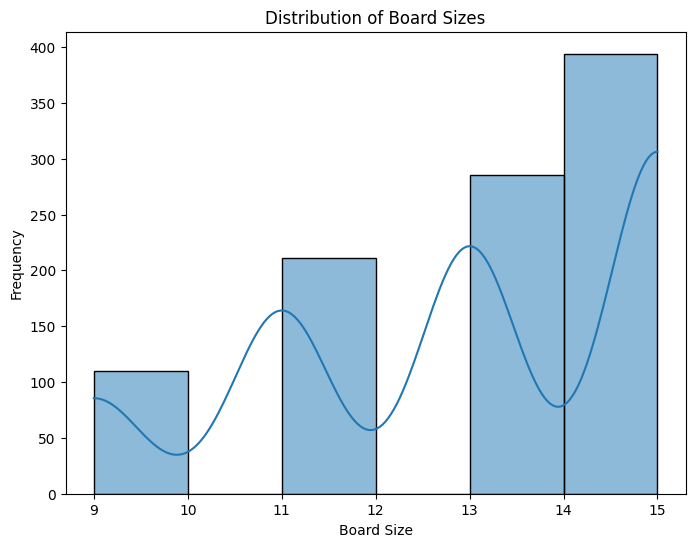

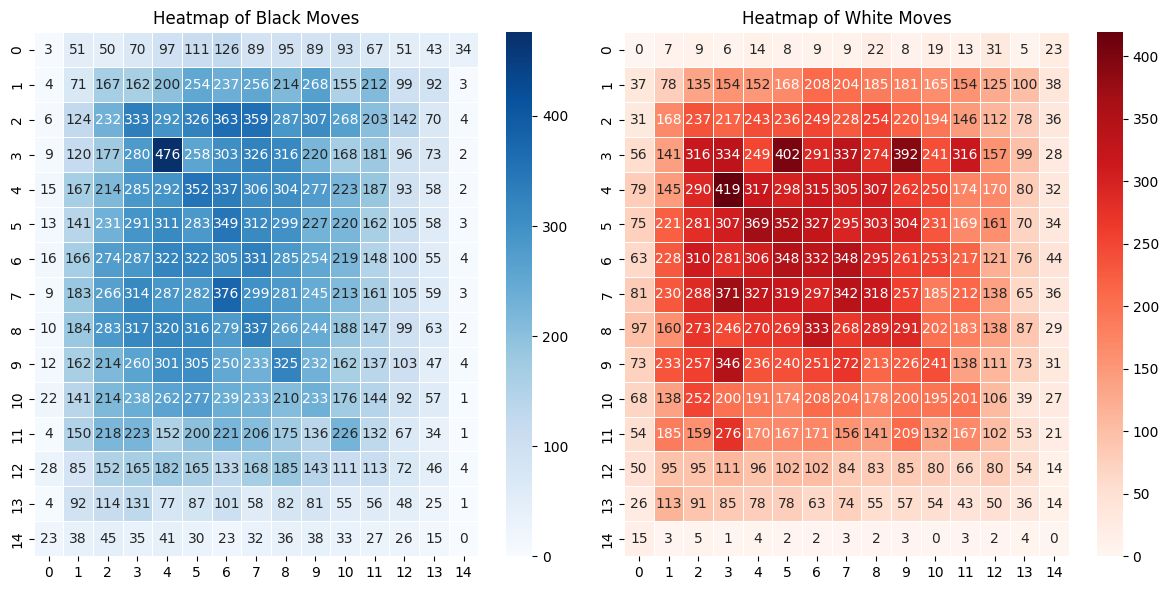

Processing NPZ file: data/kata/0163D9F0F6642BD3.npz
Board states shape: (12943, 22, 29)
Move probabilities shape: (12943, 2, 226)
Game values shape: (12943, 5, 15, 15)


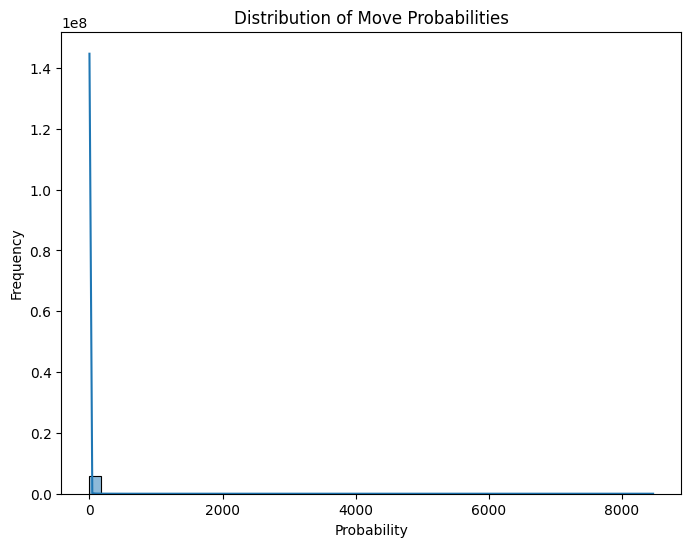

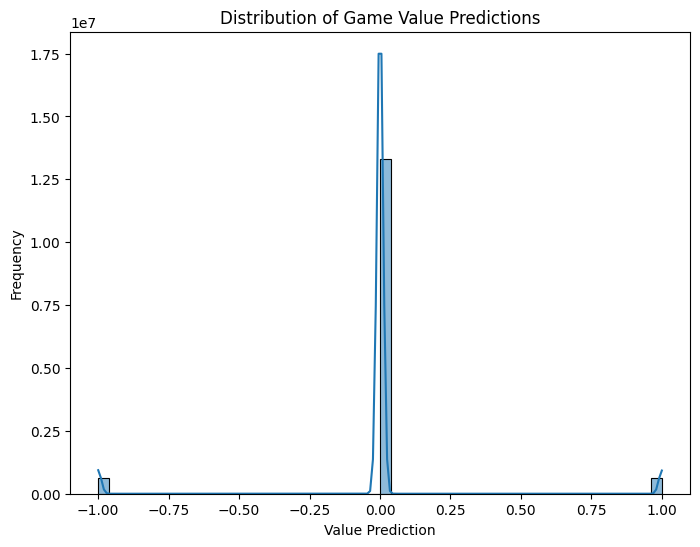

In [14]:
import os
import numpy as np
import sgf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Function to load and parse SGF/SGFS files
def load_sgf_file(file_path):
    with open(file_path, 'r') as sgf_file:
        sgf_content = sgf_file.read()
    sgf_collection = sgf.parse(sgf_content)
    return sgf_collection

# Function to display the contents of the SGF file and provide insights
def display_sgf_data(sgf_collection):
    total_games = len(sgf_collection)
    black_wins = 0
    white_wins = 0
    total_moves_per_game = []
    board_size_distribution = []
    move_coordinates = {"B": [], "W": []}

    for game_index, game in enumerate(sgf_collection):
        print(f"Game {game_index + 1}:")
        root_node = game.root
        
        # Extract metadata correctly using properties directly
        board_size = int(root_node.properties.get('SZ', ['Unknown'])[0])
        board_size_distribution.append(board_size)
        player_black = root_node.properties.get('PB', ['Unknown'])[0]
        player_white = root_node.properties.get('PW', ['Unknown'])[0]
        result = root_node.properties.get('RE', ['Unknown'])[0]
        
        # Track results for insights
        if 'B+' in result:
            black_wins += 1
        elif 'W+' in result:
            white_wins += 1

        # Extracting moves
        move_count = 0
        node = root_node
        while node is not None:
            move = node.properties.get('B') or node.properties.get('W')
            if move:
                player = 'B' if 'B' in node.properties else 'W'
                move_coordinates[player].append(move[0])  # Track move positions
                move_count += 1
            node = node.next
        
        total_moves_per_game.append(move_count)

    # Statistical summaries
    print("\n===== Game Insights =====")
    print(f"Total games: {total_games}")
    print(f"Black wins: {black_wins} ({(black_wins / total_games) * 100:.2f}%)")
    print(f"White wins: {white_wins} ({(white_wins / total_games) * 100:.2f}%)")
    print(f"Average moves per game: {np.mean(total_moves_per_game):.2f}")
    print(f"Max moves in a game: {np.max(total_moves_per_game)}")
    print(f"Min moves in a game: {np.min(total_moves_per_game)}")

    # Visualizations
    plot_board_size_distribution(board_size_distribution)
    plot_move_heatmap(move_coordinates, max(board_size_distribution))

# Function to visualize board size distribution
def plot_board_size_distribution(board_size_distribution):
    plt.figure(figsize=(8, 6))
    sns.histplot(board_size_distribution, kde=True, bins=range(min(board_size_distribution), max(board_size_distribution)+1))
    plt.title('Distribution of Board Sizes')
    plt.xlabel('Board Size')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot move heatmaps for Black and White
def plot_move_heatmap(move_coordinates, board_size):
    # Convert move coordinates to a heatmap-compatible format
    board_black = np.zeros((board_size, board_size))
    board_white = np.zeros((board_size, board_size))
    
    # Count the number of times a move is made in each position
    for move in move_coordinates['B']:
        x, y = ord(move[0]) - ord('a'), ord(move[1]) - ord('a')
        board_black[x, y] += 1
    for move in move_coordinates['W']:
        x, y = ord(move[0]) - ord('a'), ord(move[1]) - ord('a')
        board_white[x, y] += 1
    
    # Plot the heatmap for Black moves
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(board_black, cmap='Blues', cbar=True, annot=True, fmt='g', linewidths=0.5)
    plt.title('Heatmap of Black Moves')
    
    # Plot the heatmap for White moves
    plt.subplot(1, 2, 2)
    sns.heatmap(board_white, cmap='Reds', cbar=True, annot=True, fmt='g', linewidths=0.5)
    plt.title('Heatmap of White Moves')

    plt.tight_layout()
    plt.show()

# Function to load and process NPZ files for additional game insights
def load_npz_file(file_path):
    data = np.load(file_path)
    print(f"Processing NPZ file: {file_path}")

    # Get the specific arrays for insight analysis
    board_states = data['binaryInputNCHWPacked']
    move_probabilities = data['policyTargetsNCMove']
    game_values = data['valueTargetsNCHW']

    print(f"Board states shape: {board_states.shape}")
    print(f"Move probabilities shape: {move_probabilities.shape}")
    print(f"Game values shape: {game_values.shape}")

    # Statistical summary of move probabilities
    plot_probability_distribution(move_probabilities)
    
    # Visualize the value predictions
    plot_game_value_distribution(game_values)

# Function to visualize probability distribution of moves
def plot_probability_distribution(move_probabilities):
    plt.figure(figsize=(8, 6))
    sns.histplot(move_probabilities.flatten(), kde=True, bins=50)
    plt.title('Distribution of Move Probabilities')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.show()

# Function to visualize game value predictions
def plot_game_value_distribution(game_values):
    game_values_flat = game_values.flatten()

    plt.figure(figsize=(8, 6))
    sns.histplot(game_values_flat, kde=True, bins=50)
    plt.title('Distribution of Game Value Predictions')
    plt.xlabel('Value Prediction')
    plt.ylabel('Frequency')
    plt.show()

# Function to process either sgf, sgfs, or npz files
def process_output_files(path):
    if os.path.isdir(path):
        # If it's a directory, process all the files inside
        files = os.listdir(path)
        for file in files:
            file_path = os.path.join(path, file)
            process_file(file_path)
    elif os.path.isfile(path):
        # If it's a file, process the file directly
        process_file(path)
    else:
        print(f"Error: {path} is neither a file nor a directory.")

# Function to process a single file (SGF, SGFS, NPZ)
def process_file(file_path):
    if file_path.endswith('.sgf') or file_path.endswith('.sgfs'):
        print(f"Processing SGF/SGFS file: {file_path}")
        sgf_data = load_sgf_file(file_path)
        display_sgf_data(sgf_data)
    elif file_path.endswith('.npz'):
        load_npz_file(file_path)
    else:
        print(f"Unknown file format: {file_path}")

# Example usage
selfplay_log_path = "data/kata/3410D33F8D987D6B.sgfs"
process_output_files(selfplay_log_path)

# Load NPZ example
npz_file_path = "data/kata/0163D9F0F6642BD3.npz"
process_output_files(npz_file_path)
